# TP03 : Régression logistique

## Régression linéaire polynomiale 
Dans cette partie, comme expliqué en cours nous voyons un exemple simple d'un modèle linéaire sous forme d'un polynome multiple. 



In [1]:
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import numpy as np
import random

(10,)


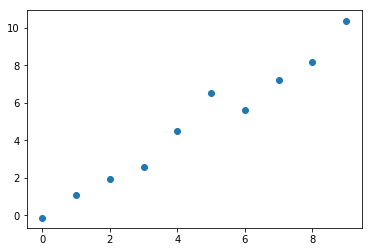

In [132]:
X = [i for i in range(10)]
Y = [random.gauss(x,0.75) for x in X]

X = np.asarray(X)
Y = np.asarray(Y)

X = X[:,np.newaxis]
Y = Y[:,np.newaxis]

plt.scatter(X,Y)

In [22]:
degree = 4 #degrès du polynome résultant. 

polynomial_features = PolynomialFeatures(degree = degree)
X_TRANSF = polynomial_features.fit_transform(X)
model = LinearRegression()
model.fit(X_TRANSF, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
Y_NEW = model.predict(X_TRANSF)

rmse = np.sqrt(mean_squared_error(Y,Y_NEW))
r2 = r2_score(Y,Y_NEW)

print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  0.33584787794120324
R2:  0.9839500592841012


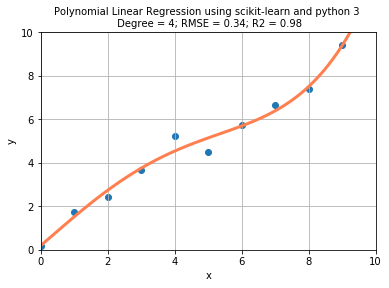

In [24]:
x_new_min = 0.0
x_new_max = 10.0

X_NEW = np.linspace(x_new_min, x_new_max, 100)
X_NEW = X_NEW[:,np.newaxis]

X_NEW_TRANSF = polynomial_features.fit_transform(X_NEW)

Y_NEW = model.predict(X_NEW_TRANSF)

plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)

plt.grid()
plt.xlim(x_new_min,x_new_max)
plt.ylim(0,10)

title = 'Degree = {}; RMSE = {}; R2 = {}'.format(degree, round(rmse,2), round(r2,2))

plt.title("Polynomial Linear Regression using scikit-learn and python 3 \n " + title,
          fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X,Y)
plt.show()

## Régression logistique 

La régression logistique est généralement utilisée à des fins de classification. Contrairement à la régression linéaire, la variable à prédire ne peut prendre qu'un nombre limité de valeurs (valeurs discrètes). 

Lorsque le nombre de résultats possibles est seulement deux, on parle de régression logistique binaire.

![](img/logistic.JPG) 

Dans la figure ci-dessus on comprend que la régression logistique est composée d'une régression linéaire suivie de l'application d'une certaine fonction. Cette fonction est la fonction sigmoid dont voici le graphe : 

![](img/sigmoid.JPG) 


## 1 - Préparation des données : 
Les données consistent en un ensemble de notes des etudiants et la valeur à prédire est si l'etudiant est admis(1) ou pas(0) 

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
header = ["Note1", "Note2", "Admis"]
notes = pd.read_csv('datasets/marks.txt', names=header)

In [65]:
X = notes.iloc[:, :-1]
y = notes.iloc[:, -1]
y.shape

(100,)

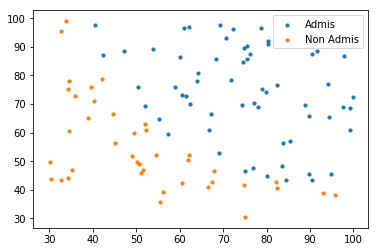

In [66]:
admis = notes.loc[y == 1]
non_admis = notes.loc[y == 0]

plt.scatter(admis.iloc[:, 0], admis.iloc[:, 1], s=10, label='Admis')
plt.scatter(non_admis.iloc[:, 0], non_admis.iloc[:, 1], s=10, label='Non Admis')
plt.legend()
plt.show()

## 2- Régression logistique 

**Expressions mathématiques :  **:
<img src="img/Math.PNG" alt="Drawing" style="width: 300px;"/>
<img src="img/cost.PNG" alt="Drawing" style="width: 300px;"/>
<img src="img/total.PNG" alt="Drawing" style="width: 300px;"/>
<img src="img/deriv.PNG" alt="Drawing" style="width: 300px;"/>

In [67]:
# TODO : Calculer le sigmoid de la valeur x 
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

# Test : 
sigmoid(0)

0.5

In [68]:
# TODO : La fonction de coût utilisée dans la régression logistique 
def J(x,y,theta): 
    m=len(y)
    predictions = sigmoid(np.dot(x,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost=1/m * sum(error)
    grad = 1/m * np.dot(x.transpose(),(predictions - y))
    return cost[0],grad
#INITIALISER LE THETA
theta = np.zeros((X.shape[1]+1,1))
#RESHAPE Y
y = y[:,np.newaxis]

In [69]:
# TODO : Programmer la fonction d'entrainement du modèle 
def train(x,y, theta ): 
    alpha=1
    m=len(y)
    J_history =[]
    for i in range(20):
        cost,grad = J(x,y,theta)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta

# TODO : fonction de normalisation des données X 
def normalisation(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm,mean,std

# TODO : Entrainer le modèle en choisissant les bons hyperparamètres.
X_,mean,std=normalisation(X)

#AJOUTER des 1 pour le parametre theta-zero 
X_= np.append(np.ones((X_.shape[0],1)),X_,axis=1)
theta=train(X_,y,theta)



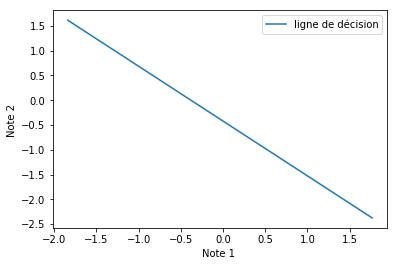

In [70]:
x_values= np.array([np.min(X_[:,1]),np.max(X_[:,1])])
y_values = (- (theta[0] + np.dot(theta[1], x_values[0])) / theta[2],  - (theta[0] + np.dot(theta[1], x_values[1])) / theta[2])

plt.plot(x_values, y_values, label='ligne de décision')
plt.xlabel('Note 1 ')
plt.ylabel('Note 2 ')
plt.legend()
plt.show()

In [74]:
# TODO : donner la fonction de prédiction qui retourne la probabilité que X est dans chaque classe 
def predict(x):
    if sigmoid(np.dot(x,theta))>0.5:
        return 1
    else :
        return 0
x_test = np.zeros((3,1))
x_test[0]=1
x_test[1]=(40-mean[0])/std[0]
x_test[2]=(70-mean[1])/std[1]
predict(x_test.transpose())



0

## 3- Implementation sous sklearn : 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

# TODO : Diviser les données en données d'entrainement et données de tests (Fait dans le TP02 )
## Décider de la taille des données pour chaque set
X_train, X_test, y_train, y_test = 

# Créer le modèle 
model = LogisticRegression()

# Entraîner le modèle 
model.fit(X, y)

# Prédire les classes 
predicted_classes = model.predict(X_test)

# Calculer le score du modèle 
accuracy = accuracy_score(y.flatten(),predicted_classes)
